## Test Assignment

Let me grab my tools for work. Need to know your stuff

You need to borrow them from  Python Garage Remove comment out pip installation from below code

In [1]:
#! pip install --user -U seaborn sklearn pandas imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import joblib

## For under and over sampling
from imblearn.under_sampling import ClusterCentroids 
from collections import Counter
from imblearn.over_sampling import SMOTE, SMOTEN

In [3]:
classifiers = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    #"LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Randomforrest": RandomForestClassifier()
}

In [4]:
def evaluate_classfiers(X_train, y_train, X_test, y_test):
    f_scores = {}
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        #training_score = cross_val_score(classifier, X_test, y_test, cv=5)
        #print("Classifiers: ", classifier.__class__.__name__, "Has a trainign score of", round(training_score.mean(), 2) * 100, "% accuracy score")
        print("Classifiers: ", classifier.__class__.__name__)
        print('Following is an evaluation report:')
        predictions = classifier.predict(X_test)
        f_scores[classifier.__class__.__name__] = evaluate_model(y_test, predictions)
    
    return f_scores

We need to score our work, so defining some magic method to do this for us. Some information

**Accuracy**: Accuracy classification score. <br />
**Precision**: The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.<br />
**Recall**: The recall is intuitively the ability of the classifier to find all the positive samples.<br />
**F1 Score**: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [5]:
def evaluate_model(original_ytest, predicitons, strategy='weighted'):
    labels = ['class 0', 'class 1']
    print("Accuracy: {}".format(accuracy_score(original_ytest, predicitons)))
    print("precision: {}".format(precision_score(original_ytest, predicitons, average=strategy)))
    print("recall: {}".format(recall_score(original_ytest, predicitons, average=strategy)))
    f1_score_value = f1_score(original_ytest, predicitons, average=strategy)
    print("F1 score: {}".format(f1_score_value))
#     print('Classification Report')
#     print(classification_report(original_ytest, predicitons))
    print('-'*30)
    return f1_score_value

### Let the EDA Begin

In [6]:
df = pd.read_csv('testdata.csv')
df.shape

(18664, 15)

In [7]:
df.head(5)

,id,product,amount,price,unit,tax,invoiceid,bodyid,invoicestatusid,customername,currencycode,billdate,account_code,vat_deducation,vat_status
0,4QZKqdn,Ciaran Aguilar + John Velasquez Lewis Bailey,12.0,10.416,kpl,24.0,W49KRV,xr5J,bw,Libero Mauris Corp.,EUR,2020-10-20 00:00:00.0,M5zP,100.0,09e2f
1,nAPx9YZ,Claudia Gould,1.0,20.832,kpl,24.0,W49KRV,xr5J,bw,Libero Mauris Corp.,EUR,2020-10-20 00:00:00.0,M5zP,100.0,09e2f
2,w7vZWbE,Lacota Shaw,1.0,12.648,kpl,24.0,W49KRV,xr5J,bw,Libero Mauris Corp.,EUR,2020-10-20 00:00:00.0,M5zP,100.0,09e2f
3,pw8EZM8,-,1.0,0.000,kpl,24.0,W49KRV,xr5J,bw,Libero Mauris Corp.,EUR,2020-10-20 00:00:00.0,M5zP,100.0,09e2f
4,qZ1pYGL,Cassandra Phelps Emerald Pratt Oscar Mccullou...,4.0,498.480,kpl,24.0,MkQY0a,xr5J,bw,Libero Mauris Corp.,EUR,2020-10-20 00:00:00.0,M5zP,100.0,09e2f


In [8]:
# indexing and adding new date features

df.index = pd.to_datetime(df['billdate'])
df = df.sort_index()
df['month'] = df.index.month
df['week'] = df.index.week
df['weekday'] = df.index.weekday

In [9]:
df.count()

id                 18664
product            18664
amount             18664
price              18664
unit               16663
tax                18664
invoiceid          18664
bodyid             18664
invoicestatusid    18664
customername       18664
currencycode       18664
billdate           18664
account_code       18664
vat_deducation     18664
vat_status         18664
month              18664
week               18664
weekday            18664
dtype: int64

Looks like we have some NaN "unit" fearture, other than that everything looks fine

In [10]:
df.nunique()

id                 18664
product             7999
amount               370
price               5502
unit                  21
tax                    4
invoiceid           2140
bodyid                 8
invoicestatusid        8
customername         627
currencycode           2
billdate             113
account_code         173
vat_deducation         2
vat_status             7
month                 12
week                  28
weekday                7
dtype: int64

Fearures other than id, amount, price, tax and vat_deducation are categorical

#### Let make it visulaize

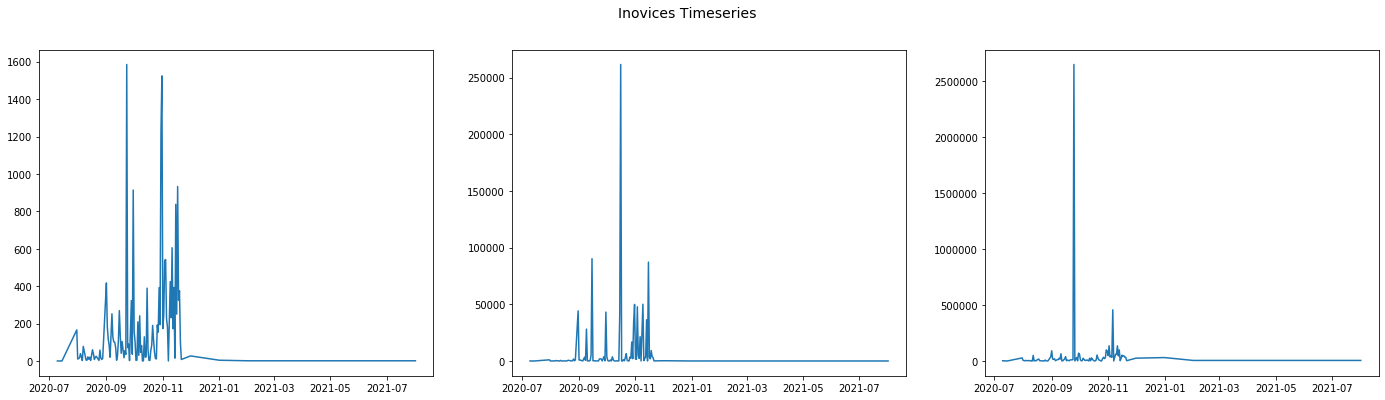

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['0', '1']
f.suptitle('Inovices Timeseries', fontsize=14)

df['invoiceid'].groupby(df.index.date).count().plot(ax=ax1)
df['amount'].groupby(df.index.date).sum().plot(ax=ax2)
df['price'].groupby(df.index.date).sum().plot(ax=ax3)

Some insgihts from above timeseries are:
- Most of the invoices generated at the end quater of 2020
- 10-2020 had the most invoices
- The highest amount received on a single date reached to almost 250K euros
- Similarly the price recoreded was 2.5M
- For some reason there is also a data from future, may be projections

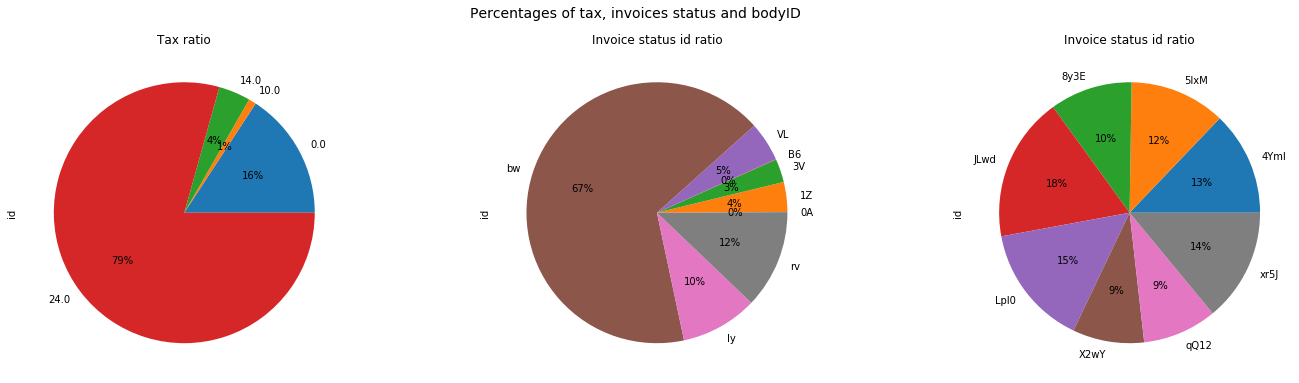

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['0', '1']
f.suptitle('Percentages of tax, invoices status and bodyID', fontsize=14)

df.groupby('tax').count()['id'].plot.pie(autopct='%1.0f%%', title="Tax ratio", ax=ax1)
df.groupby('invoicestatusid').count()['id'].plot.pie(autopct='%1.0f%%', title="Invoice status id ratio", ax=ax2)
df.groupby('bodyid').count()['id'].plot.pie(autopct='%1.0f%%', title="Invoice status id ratio", ax=ax3)

- The most tax deducateble is 24% from the given invoices
- The status of Tax which we most mentioned were "BW", followed by "RV" and "LY"
- The bodyId howeverm show balanced distribution in which code "JLwd" leads

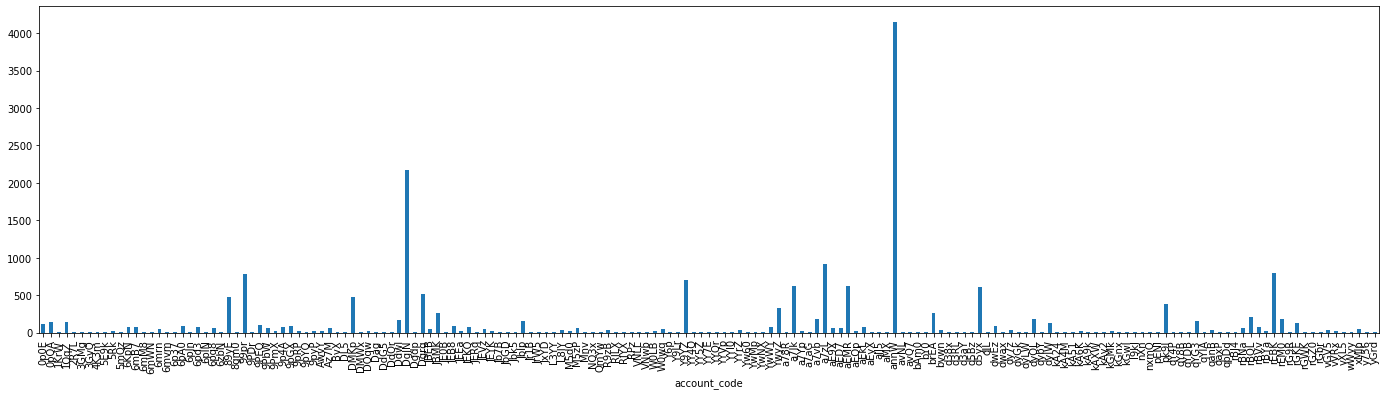

In [13]:
df.groupby('account_code').count()['id'].plot.bar(figsize=(24,6))

The above graph is a important for our modeling. Here we can clearly observe imbalance class case. The data is skewed to two classes with almost 4000 and 2200 record respectively. Moreover, on more important thing to notice that some of the minority classes have very less samples ~<5 smaples. These classes will not be able to contribute much in our model. 

From above picture, I decided to take some action points over this dataset
- Remove classes which are less than <5 samples, as they will not contribute to the model and can not participate in modeling as train/test split can not be justified with such classes. Other appraoch could be to collect them and mark them as single class, but as the context of data is hidden, I decided to remove them
- Use both undersampling and oversampling methods to fix the imblance case

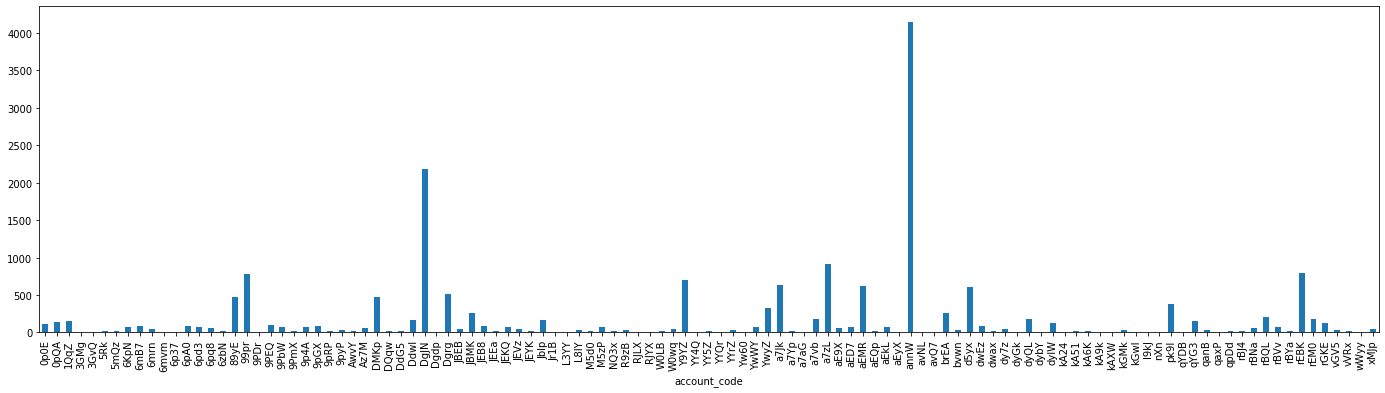

In [14]:
df.groupby('account_code').filter(lambda x: len(x) > 5).groupby('account_code').count()['id'].plot.bar(figsize=(24,6))

### Data Transformation

In [15]:
df['product'] = df['product'].apply(lambda x : x.lower())
df['customername'] = df['customername'].apply(lambda x : x.lower())

In [16]:
unit_dic = dict(enumerate(df['unit'].astype('category').cat.categories))
invoiceid_dic = dict(enumerate(df['invoiceid'].astype('category').cat.categories))
bodyid_dic = dict(enumerate(df['bodyid'].astype('category').cat.categories))
invoicestatusid_dic = dict(enumerate(df['invoicestatusid'].astype('category').cat.categories))
currencycode_dic = dict(enumerate(df['currencycode'].astype('category').cat.categories))
vat_status_dic = dict(enumerate(df['vat_status'].astype('category').cat.categories))
customername_dic = dict(enumerate(df['customername'].astype('category').cat.categories))
product_dic = dict(enumerate(df['product'].astype('category').cat.categories))
account_code_dic = dict(enumerate(df['account_code'].astype('category').cat.categories))

In [17]:
df['unit'] = df['unit'].astype('category').cat.codes
df['invoiceid'] = df['invoiceid'].astype('category').cat.codes
df['bodyid'] = df['bodyid'].astype('category').cat.codes
df['invoicestatusid'] = df['invoicestatusid'].astype('category').cat.codes
df['currencycode'] = df['currencycode'].astype('category').cat.codes
df['vat_status'] = df['vat_status'].astype('category').cat.codes
df['customername'] = df['customername'].astype('category').cat.codes
df['product'] = df['product'].astype('category').cat.codes
df['account_code'] = df['account_code'].astype('category').cat.codes

Let check the correlation between the target column and other features

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,product,amount,price,unit,tax,invoiceid,bodyid,invoicestatusid,customername,currencycode,account_code,vat_deducation,vat_status,month,week,weekday
product,1.000000,0.005999,0.003476,-0.084122,0.010655,0.063291,-0.068850,0.039266,-0.046385,0.010195,-0.093380,0.011462,-0.043856,0.041067,0.022585,-0.065188
amount,0.005999,1.000000,-0.000677,-0.005936,0.012604,-0.007487,-0.008100,0.002900,-0.016219,-0.000205,0.000898,0.008160,-0.004627,0.001302,0.000010,0.008527
price,0.003476,-0.000677,1.000000,0.002522,-0.034340,-0.014049,-0.022348,0.016357,0.000265,0.001433,-0.006014,-0.007926,0.003142,-0.010567,-0.009462,0.010904
unit,-0.084122,-0.005936,0.002522,1.000000,-0.106372,-0.018604,0.069016,-0.006916,-0.015213,0.002540,-0.015106,-0.014464,0.030954,0.070154,0.082729,0.083821
tax,0.010655,0.012604,-0.034340,-0.106372,1.000000,0.058517,0.001321,0.018131,0.066863,-0.016307,-0.036554,0.588125,-0.395143,-0.004318,0.029855,0.000367
invoiceid,0.063291,-0.007487,-0.014049,-0.018604,0.058517,1.000000,0.026880,0.112609,-0.004514,0.000171,0.030360,0.012319,-0.029139,-0.030964,0.015492,0.000133
bodyid,-0.068850,-0.008100,-0.022348,0.069016,0.001321,0.026880,1.000000,0.282661,0.086370,0.001819,-0.059946,-0.086119,0.078275,0.377461,0.408735,0.113159
invoicestatusid,0.039266,0.002900,0.016357,-0.006916,0.018131,0.112609,0.282661,1.000000,-0.023149,-0.000292,-0.078050,-0.026014,0.021221,0.120557,0.114403,-0.032048
customername,-0.046385,-0.016219,0.000265,-0.015213,0.066863,-0.004514,0.086370,-0.023149,1.000000,0.001065,-0.123969,0.019913,0.010730,-0.141335,-0.093112,-0.048831
currencycode,0.010195,-0.000205,0.001433,0.002540,-0.016307,0.000171,0.001819,-0.000292,0.001065,1.000000,0.005727,-0.023655,0.044711,0.000375,0.003181,0.002299


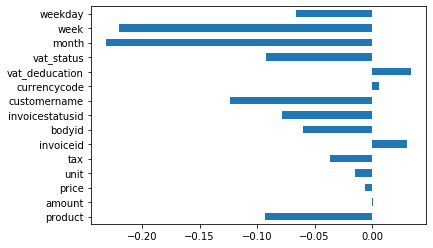

In [19]:
corr['account_code'].drop('account_code').plot(kind='barh')

Its look like components of time is negatively correlated to the account code while only InvoiceId and VAT are positively correlated to the account code

NOTE:
As mentioned in the requirements that some inoviceID had more than one account code and for such cases the model should classify the most frequent Account code. This requirement creates a Heuristic rule which doesn't need any ML modeling to get results. To satisfy such requiremt we will keep a record of dictionary of InoviceID mapped to most frequent accound code and if such inovice ID is request we use this Heuristic disctionary to generate results (classify Invoice ID)

In [20]:
df.groupby(['invoiceid' ,'account_code']).count()['id']

invoiceid  account_code
0          29               2
           95               8
           110              1
1          110              3
2          29               4
                           ..
2135       26              12
2136       149              4
2137       128              5
2138       110              7
2139       40               3
Name: id, Length: 2569, dtype: int64

In [21]:
grouped = df.groupby(['invoiceid' ,'account_code']).count()['id'].reset_index()
grouped.head()

,invoiceid,account_code,id
0,0,29,2
1,0,95,8
2,0,110,1
3,1,110,3
4,2,29,4


In [22]:
freq_account_code = {}
for x in range(max(grouped['invoiceid'])):
    if len(grouped[grouped['invoiceid']==x]) > 1:
        row = grouped.loc[grouped[grouped['invoiceid']==x]['id'].idxmax()]
        freq_account_code[x] = row['account_code']

In [23]:
len(freq_account_code)

206

### Experimentation time!!! , bring me my lab coat

Many numbers ahead, process on your on risk

First, let me make my model as dumb as possible and let see what it can tell us

In [24]:
df = df.reset_index(drop=True)

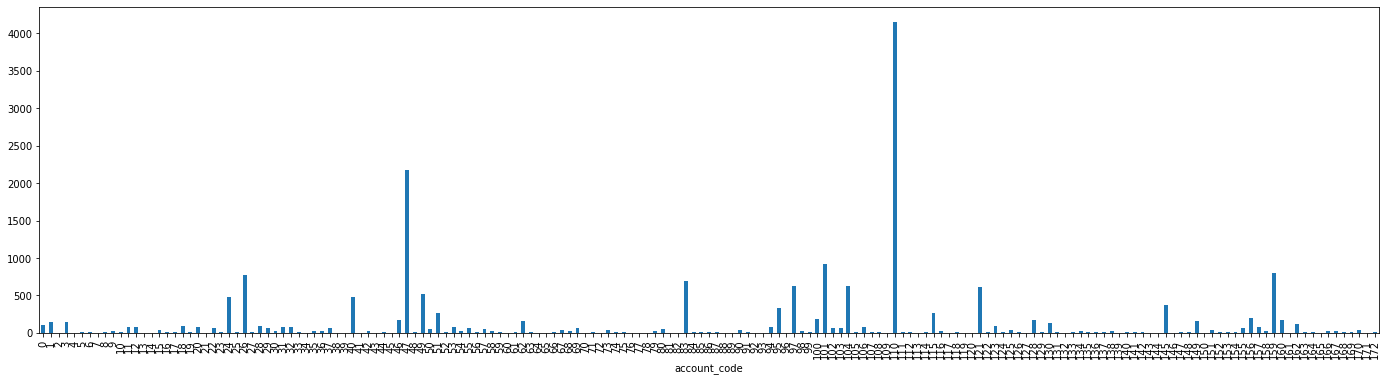

In [25]:
X = df.drop(columns=['account_code', 'billdate', 'id'])
y = df['account_code']
y.groupby(y).count().plot.bar(figsize=(24,6))

Since we already habve heuristic rule for certain invoice ids, hence we will remove all such inovices. also we will remove any classes which dont have more than 5 sampels


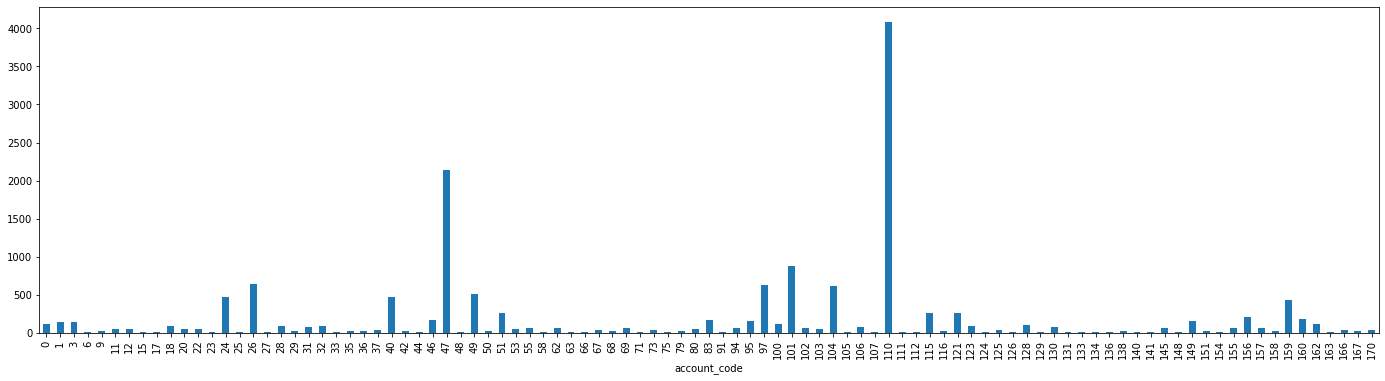

In [26]:
df_temp = df.drop(df[df['invoiceid'].isin(list(freq_account_code.keys()))].index)
df_temp = df_temp.drop(df_temp.groupby('account_code').filter(lambda x: len(x) < 5).index)
X = df_temp.drop(columns=['account_code', 'billdate', 'id'])
y = df_temp['account_code']
y.groupby(y).count().plot.bar(figsize=(24,6))

In [27]:
df.shape

(18664, 18)

We need to fix these distributions through sampling. But remember sampling should only be done on training data! 

In [28]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
evaluate_model(y, dummy_clf.predict(X))

Accuracy: 0.2617337778917671
precision: 0.06850457048949689
recall: 0.2617337778917671
F1 score: 0.10858799485254532
------------------------------


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.10858799485254532

Not a good score. But this is our base score, we need to have results better than our dummy classifier which used strategy as "most_frequent" which blindly predict majority class.

In [29]:
# using StratifiedKFold which balance data samples between each train and test splits equally w.r.t target classes

# testing our main classifiers without over/under smapling techniques
index = 0
sss = StratifiedKFold(n_splits=3)
clf_f_scores = []
for train_index, test_index in sss.split(X, y):
    index+=1
    print("Train:", train_index, "Test:", test_index)
    print("="*30)
    print("Split {}".format(index))
    print("="*30)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    clf_f_scores.append(evaluate_classfiers(original_Xtrain, original_ytrain, original_Xtest, original_ytest))

randforst_f_scores = []
for x in clf_f_scores:
    randforst_f_scores.append(x['RandomForestClassifier'])

print('Average F1 score for Random forest is {}'.format(np.mean(randforst_f_scores)))

Train: [   71    72    73 ... 15593 15594 15595] Test: [    0     1     2 ... 14280 14281 14282]
Split 1
Classifiers:  DummyClassifier
Following is an evaluation report:
Accuracy: 0.26178111175226004
precision: 0.06852935047024926
recall: 0.26178111175226004
F1 score: 0.10862319911427622
------------------------------
Classifiers:  KNeighborsClassifier
Following is an evaluation report:


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.38526639738411234
precision: 0.3800279053684338
recall: 0.38526639738411234
F1 score: 0.3692418221055568
------------------------------
Classifiers:  DecisionTreeClassifier
Following is an evaluation report:
Accuracy: 0.5308713214079631
precision: 0.7077682409558157
recall: 0.5308713214079631
F1 score: 0.5606316496166759
------------------------------


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifiers:  RandomForestClassifier
Following is an evaluation report:
Accuracy: 0.5714560492402385
precision: 0.7192904068141691
recall: 0.5714560492402385
F1 score: 0.5587053724871557
------------------------------
Train: [    0     1     2 ... 15593 15594 15595] Test: [   71    72    73 ... 15361 15362 15363]
Split 2
Classifiers:  DummyClassifier
Following is an evaluation report:
Accuracy: 0.26178111175226004
precision: 0.06852935047024926
recall: 0.26178111175226004
F1 score: 0.10862319911427622
------------------------------
Classifiers:  KNeighborsClassifier
Following is an evaluation report:


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5429890363531449
precision: 0.5344581491364725
recall: 0.5429890363531449
F1 score: 0.5240686739083659
------------------------------
Classifiers:  DecisionTreeClassifier
Following is an evaluation report:
Accuracy: 0.8834391229082516
precision: 0.8999648809718674
recall: 0.8834391229082516
F1 score: 0.8819233355793833
------------------------------


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifiers:  RandomForestClassifier
Following is an evaluation report:
Accuracy: 0.86266589728794
precision: 0.867437792762009
recall: 0.86266589728794
F1 score: 0.8517660231949049
------------------------------
Train: [    0     1     2 ... 15361 15362 15363] Test: [  421   426   623 ... 15593 15594 15595]
Split 3
Classifiers:  DummyClassifier
Following is an evaluation report:
Accuracy: 0.26163909195844554
precision: 0.06845501444083991
recall: 0.26163909195844554
F1 score: 0.10851758617367672
------------------------------
Classifiers:  KNeighborsClassifier
Following is an evaluation report:


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.31762216237014235
precision: 0.36051939243902975
recall: 0.31762216237014235
F1 score: 0.31477871279899083
------------------------------
Classifiers:  DecisionTreeClassifier
Following is an evaluation report:
Accuracy: 0.3755290496344748
precision: 0.6561914686647004
recall: 0.3755290496344748
F1 score: 0.3684776455267253
------------------------------


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifiers:  RandomForestClassifier
Following is an evaluation report:
Accuracy: 0.42458637937668336
precision: 0.6339309545884985
recall: 0.42458637937668336
F1 score: 0.3857587618256628
------------------------------
Average F1 score for Random forest is 0.5987433858359078


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From above results its seems like random forest perform well with average f1 score = ~0.59 

In [30]:
# testing our main classifiers without over/under smapling techniques
index = 0
sss = StratifiedKFold(n_splits=3)
clf_f_scores = []
for train_index, test_index in sss.split(X, y):
    index+=1
    print("Train:", train_index, "Test:", test_index)
    print("="*30)
    print("Split {}".format(index))
    print("="*30)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=500)).fit(original_Xtrain, original_ytrain)
    clf_f_scores.append(evaluate_model(original_ytest, clf.predict(original_Xtest)))

print('-'*30)
print('Average F1 score for Random forest is {}'.format(np.mean(clf_f_scores)))
print('-'*30)

Train: [   71    72    73 ... 15593 15594 15595] Test: [    0     1     2 ... 14280 14281 14282]
Split 1
Accuracy: 0.6353144835545297
precision: 0.7572256896796005
recall: 0.6353144835545297
F1 score: 0.6271097466165458
------------------------------
Train: [    0     1     2 ... 15593 15594 15595] Test: [   71    72    73 ... 15361 15362 15363]
Split 2


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8878630505866513
precision: 0.8947881815450407
recall: 0.8878630505866513
F1 score: 0.879005178351478
------------------------------
Train: [    0     1     2 ... 15361 15362 15363] Test: [  421   426   623 ... 15593 15594 15595]
Split 3


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5555983070411696
precision: 0.7490714642809019
recall: 0.5555983070411696
F1 score: 0.5231615947902623
------------------------------
------------------------------
Average F1 score for Random forest is 0.6764255065860953
------------------------------


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
ratio_dict = {}
index = 0
clf_f_scores = []
sss = StratifiedKFold(n_splits=3)
for train_index, test_index in sss.split(X, y):
    index+=1
    print("Train:", train_index, "Test:", test_index)
    print("="*30)
    print("Split {}".format(index))
    print("="*30)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    cc = ClusterCentroids(sampling_strategy={47:800, 110:800}, random_state=42)
    X_res, y_res = cc.fit_resample(original_Xtrain, original_ytrain)
    X_resampled, y_resampled = SMOTE(sampling_strategy='not majority' ,k_neighbors=2).fit_resample(X_res, y_res)
    clf = OneVsRestClassifier(RandomForestClassifier()).fit(X_resampled, y_resampled)
    clf_f_scores.append(evaluate_model(original_ytest, clf.predict(original_Xtest)))

print('-'*30)
print('Average F1 score for Random forest is {}'.format(np.mean(clf_f_scores)))
print('-'*30)

Train: [   71    72    73 ... 15593 15594 15595] Test: [    0     1     2 ... 14280 14281 14282]
Split 1


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (415) found smaller than n_clusters (800). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


Accuracy: 0.6262742835160607
precision: 0.7681879893785158
recall: 0.6262742835160607
F1 score: 0.631931645224733
------------------------------
Train: [    0     1     2 ... 15593 15594 15595] Test: [   71    72    73 ... 15361 15362 15363]
Split 2


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (785) found smaller than n_clusters (800). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


Accuracy: 0.8878630505866513
precision: 0.9039127842264478
recall: 0.8878630505866513
F1 score: 0.887643060282878
------------------------------
Train: [    0     1     2 ... 15361 15362 15363] Test: [  421   426   623 ... 15593 15594 15595]
Split 3


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (535) found smaller than n_clusters (800). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))


Accuracy: 0.47941515967679876
precision: 0.7615841438135258
recall: 0.47941515967679876
F1 score: 0.4916187585630141
------------------------------
------------------------------
Average F1 score for Random forest is 0.670397821356875
------------------------------


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lets find which feature contributes more in predicting account code

<BarContainer object of 15 artists>

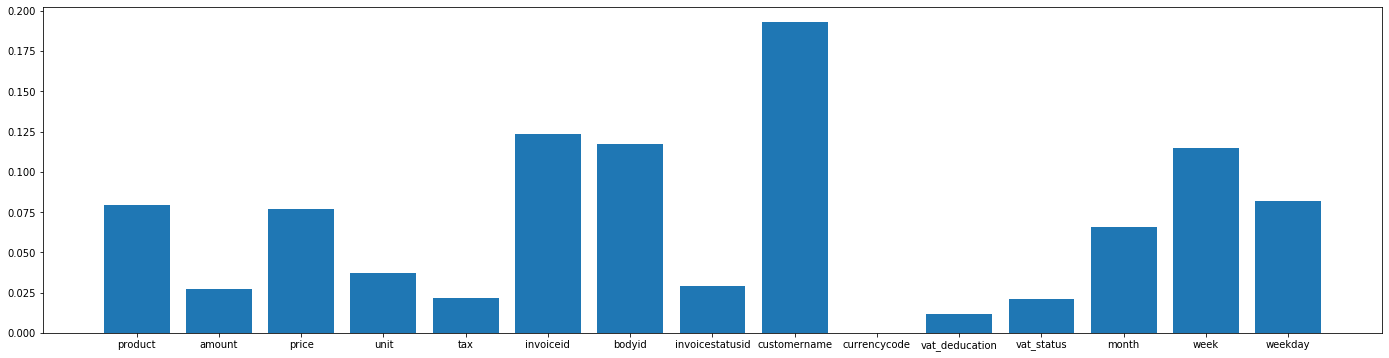

In [32]:
plt.subplots(figsize=(24,6))
clf = RandomForestClassifier().fit(original_Xtrain, original_ytrain)
plt.bar(list(original_Xtrain.columns), clf.feature_importances_)

### Conclusion

From EDA we know many things earlier about the problem and possible solutions.

- A provided dataset is imbalanced with highly skewed to two classes.
- The provided dataset implies multiclass problem
- Some of the classes sampels were very few which would not contribute much to the model creation which was removed in further processing
-  Most of the data is cateogrical which need to be stored someplace to map incoming request to model frendly format
- It was an obvious choice to choose a non linear model for this problem which is why I choose Random forest. Another reason is due to the feature set, decision trees tend to work better on categorical data
- As data was imbalanced, we need to apply sampling methods to remove the high biasness for that we used two classical methods undersampling with random mechanism and oversampling with SMOTE.
- From the observation and experiments it was conluded that by far we get almost ~0.68 F1score from Randoforest model with One Vs Rest classifier architecutre for this dataset.
- Methods like oversampling and undersampling doesn't provide better results which is interesting observation and thus we didn't use them to make our model simpler
- Comparatively, there was a major difference between with and without undersampling and oversampling scores, were 0.66 and 0.68 (F1 scores). 

Fianlly it could be said the minority class has some unique characteristics captured by random forest to predict the right calss. That feature would definitely be **customer name**

**NOTE:**
I could try more models and different sampling methods but for the assignment purpose I guess I provided enough information which can prove my analysis and problem solving skills.
Moreover I productionize my solution on AWS cloud and make it available for everyone to use. Making this assignement as MVP

I really want to get a feedback from you guys on my work and my methods. Lastly, sorry for inscript jokes its just how I work and make my reader to enjoy my work :)